# Sesión 6
## Scrapping de Redes Sociales y Análisis de Sentimiento

### Caso: McDonald's 
#### ¿Qué piensan los clientes de mi empresa/producto?

##### Contenido

1. Presentación del Caso
    * Motivación (Problemática y Estadísticas)
    * Objetivo
2. Desarrollo del Notebook
    * Preprocesamiento de Datos
    * Análisis Exploratorio
    * Modelado
3. Análisis de Resultados
    * Métricas de Evaluación
    * Insights
    * Oportunidades
4. Planeamiento para medición de acciones y resultados
    * Cómo medir acciones y resultados cuando el modelo sea utilizado
5. Toma de acciones y reconomiento de nueva metricas
    * Definición de acciones que debemos tomar con los resultados obtenidos y evaluar nuevas oportunidades para obtención de métricas y datos

# Presentación del Caso

## Motivación

### Problemática

Las empresas, sin importar su tamaño, están expuestas a la opinión del público, sea buena o mala. En la actualidad, uno de los canales de comunicacion y publicacion de estas opiniones son las redes sociales.

![3.2-mil-millones-usuarios](https://bit.ly/37BuWxg) | ![generations](https://bit.ly/38xguHW)
---|---

Por este motivo las diferentes redes sociales (como facebook, instagram, youtube, twitter, etc) ofrecen una sección de analytics para las empresas o perfiles de influencers.

![54-busca-prod](https://bit.ly/2vA71RD) | ![71-impacto](https://bit.ly/2HtvWJt)
---|---


Sin embargo, el nivel de detalle es descriptivo y no ofrece análisis más avanzados, como por ejemplo el sentimiento de cada uno de las interacciones (comentarios, twits, etc.). 

![sentiment-scale](https://bit.ly/2OZjDZq)

Este conocimiento profundo de la relación con los clientes puede ser determinante para tomar decisiones de negocio que permitan diferenciarte de la competencia y alcanzar los objetivos de la empresa.

![social-media-dashboard](https://bit.ly/39D8Ls2)

Asimismo, las empresas pueden monitorear su presencia en redes sociales y poner objetivos de "engagment" o "affinity" con sus usuarios. El alto uso de redes sociales permite medir estos y otros indicadores en tiempo real. Por ejemplo, en tiempos de crisis, es posible evaluar la efectividad de las estrategias de mejora de imagen/posicionamiento de marca. En ese sentido, hoy evaluaremos las redes sociales de McDonald's una empresa que recientemente ha pasado por una crisis muy fuerte relacionada a un lamentable hecho en las instalaciones de una de sus franquicias.

## Objetivo de la Sesión

Realizar el análisis de las redes sociales de McDonalds, este objetivo lo dividiremos en las siguientes tareas:

- Obtención de datos
- Cálculo de indicadores simples
- Análisis de sentimiento

Finalmente, obtener algunos insights apartir del análisis realizado.

# Manos a la obra

## Primero importaremos las librerias necesarias

In [48]:
from bs4 import BeautifulSoup # Herramienta de web scrapping

import requests # Herramienta para consultar paginas web

import pandas as pd # Herramienta de manipulacion de datos (reemplaza a excel)

import random # Generación de números aleatorios

from datetime import datetime # Herramienta para trabajar con fechas

# Herramienta de visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para texto
import re # Herramienta para expresiones regulares
from nltk.corpus import stopwords # Herramienta de procesamiento de lenguaje natural
%pip install unidecode
from unidecode import unidecode # Traduce caracateres especiales

Note: you may need to restart the kernel to use updated packages.


In [49]:
sns.set(style="ticks", color_codes=True) # Estilo de gráficos

In [50]:
%matplotlib inline

## Obtención de datos

Existen diversas formas de obtener datos de redes sociales. En el caso más simple, se pueden descargar los datos de tu propia página en la sección de datos o analytics. Sin embargo, muchas veces es necesario obtener más datos de los que se entregan en estos servicios predeterminados. Asimismo, si deseas realizar una comparación entre marcas o empresas es necesario obtener los datos mediante otro método. 

![scrapping-process](https://i.imgur.com/zrMPtRi.png)

En ese sentido, el método de Web Scraping permite la recopilación automática de grandes cantidades de información de sitios web para su posterior análisis.

![web-example](https://i.imgur.com/VSjetX1.png)

### Acontinuación vamos a extraer la fecha de un post en Facebook

... Esto lo haremos a modo de ejemplo debido a que extraer todo el contenido que necesitamos para el análisis tomaría mucho tiempo

In [59]:
# URL que vamos a scrappear
url_post = 'https://www.facebook.com/share/p/L1iktYvNkn6G3b45/'

In [60]:
# Solicitud del codigo fuente de la url
post_source_html = requests.get(url_post)
post_source_html.ok # Validamos si recibimos todo correcto

True

In [61]:
# Herramienta para procesar archivos html
soup_photo = BeautifulSoup(post_source_html.text, 'html.parser')

In [70]:
# Filtramos segun las etiquetas y los atributos de las mismas para obtener la fecha de publicación
post_date_element = soup_photo.find("span", attrs={"class": "timestampContent"})
if post_date_element:
    post_date = post_date_element.text
else:
    post_date = "fecha no encontrada"


In [71]:
# Verificamos la fecha obtenida
post_date

'fecha no encontrada'

### Ahora que ya vimos un ejemplo de como extraer los datos web, usaremos un archivo de datos previamente generado para hacer el análisis con mayor detalle


In [56]:
df_fb_comments = pd.read_csv('https://raw.githubusercontent.com/Claudio9701/web-scraping-sentiment-analysis/master/fb_comments_mcdo.csv')

In [57]:
df_fb_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_text  78 non-null     object
 1   comment_user  78 non-null     object
 2   facebook_url  78 non-null     object
 3   page_name     78 non-null     object
 4   post_date     78 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [58]:
df_fb_comments.head()

,comment_text,comment_user,facebook_url,page_name,post_date
0,¿Dejaron que los bomberos entren a ayudar a sa...,/jorge.l.chavez.148,https://www.facebook.com/McDonaldsPeru/photos/...,McDonaldsPeru,2019-12-16
1,"Así es Diego, ¡ve por el tuyo!",/McDonaldsPeru/,https://www.facebook.com/McDonaldsPeru/photos/...,McDonaldsPeru,2020-01-16
2,…,#,https://www.facebook.com/McDonaldsPeru/photos/...,McDonaldsPeru,2019-12-16
3,(Y),/diego.romerogarcia.9887,https://www.facebook.com/McDonaldsPeru/photos/...,McDonaldsPeru,2020-01-16
4,😑,/danny.hidalgoasencios,https://www.facebook.com/McDonaldsPeru/photos/...,McDonaldsPeru,2019-12-16


### Ahora calculemos el sentimiento de estos comentarios 

Debemos seguir los siguientes pasos:

1. Obtener un **diccionario de palabras positivas y negativas**
2. **Limpiar** las palabras del diccionario y los comentarios
4. Calcular el **numero de palabras asociadas a cada sentimiento** por comentario
6. **Visualizar** el resultado

In [19]:
# Cargamos las palabras y su sentimiento
words_sentiment = pd.read_csv('https://raw.githubusercontent.com/Claudio9701/web-scraping-sentiment-analysis/master/words_sentiment.csv')

In [20]:
# Obtenemos informacion general de los datos
words_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14155 entries, 0 to 14154
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       14155 non-null  object
 1   sentiment  14155 non-null  object
dtypes: object(2)
memory usage: 221.3+ KB


In [21]:
# Obtenemos un vistazo de las primeras 5 filas de los datos
words_sentiment.head()

,word,sentiment
0,Acogedor,positive
1,Agradable,positive
2,Amabilidad,positive
3,Apocalipsis,positive
4,Besitos,positive


In [22]:
# Limpiamos las palabras del diccionario
words_sentiment['word'] = words_sentiment['word'].apply(unidecode) # Elimina caracteres especiales
words_sentiment['word'] = words_sentiment['word'].str.lower() # Pone todo en minusculas

In [23]:
# Lista de palabras positivas
pos_words = words_sentiment[words_sentiment['sentiment'] == 'positive']
pos_words = pos_words['word'].values.tolist()

# Lista de palabras negativas
neg_words = words_sentiment[words_sentiment['sentiment'] == 'negative']
neg_words = neg_words['word'].values.tolist()

### Ahora seleccionaremos un comentario como ejemplo

In [24]:
text = df_fb_comments.loc[20,'comment_text']
print(text)

Mcdonalds la central debe retirar la franquicia y cerrar en todo el peru tal como lo hizo Domino's cuando encontraron cucarachas en sus locales algo más ínfimo a comparación de esta tragedia


In [25]:
# Limpiamos el comentario
text_ = unidecode(text) # Elimina caracateres especiales
text_ = re.sub("[^ a-zA-Z]", "", text_) # Elimina puntuacion y otros
text_ = text_.lower() # Pone todo en minúsculas
print(text_)

mcdonalds la central debe retirar la franquicia y cerrar en todo el peru tal como lo hizo dominos cuando encontraron cucarachas en sus locales algo mas infimo a comparacion de esta tragedia


In [26]:
tokens = text_.split(" ") # Separa las palabras por espacios -> lista de tokens            
print(tokens)

['mcdonalds', 'la', 'central', 'debe', 'retirar', 'la', 'franquicia', 'y', 'cerrar', 'en', 'todo', 'el', 'peru', 'tal', 'como', 'lo', 'hizo', 'dominos', 'cuando', 'encontraron', 'cucarachas', 'en', 'sus', 'locales', 'algo', 'mas', 'infimo', 'a', 'comparacion', 'de', 'esta', 'tragedia']


In [28]:
# Obten las palabras stopwords
import nltk
nltk.download('stopwords')
stopwords_set = set(stopwords.words("spanish")) 
# Eliminamos las palabras stopwords
clean_words = [t for t in tokens if not t in stopwords_set]
print(clean_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gerar\AppData\Roaming\nltk_data...


['mcdonalds', 'central', 'debe', 'retirar', 'franquicia', 'cerrar', 'peru', 'tal', 'hizo', 'dominos', 'encontraron', 'cucarachas', 'locales', 'mas', 'infimo', 'comparacion', 'tragedia']


[nltk_data]   Unzipping corpora\stopwords.zip.


In [29]:
# Conteo de palabras positivas y negativas
pos_word_count = 0
neg_word_count = 0

for word in clean_words:
    if word in pos_words:
        pos_word_count += 1
    if word in neg_words:
        neg_word_count += 1

print('# de palabras positivas: ', pos_word_count)
print('# de palabras negativas: ', neg_word_count)

# de palabras positivas:  2
# de palabras negativas:  4


### Ahora haremos el procedimiento para todos los comentarios ...
... para hacer esto mas simple utilizaremos funciones

In [30]:
def clean_text(text):
    # Eliminar caracteres que no sean a-z y A-Z => https://regexr.com/
    text_ = unidecode(text)
    text_ = re.sub("[^ a-zA-Z]", "", text_)
    text_ = text_.lower()
    
    # Tokeniza el texto
    tokens = text_.split(" ")              
    
    # Obtenemos la lista de stopwords
    stopwords_set = set(stopwords.words("spanish"))
    
    # Eliminamos las palabras stopwords del texto
    clean_words = [token for token in tokens if not token in stopwords_set]
    
    return clean_words

In [31]:
def get_sentiment(text, pos_words, neg_words):
    # Conteo de palabras positivas y negativas
    pos_word_count = 0
    neg_word_count = 0
    
    for word in text:
        if word in pos_words:
            pos_word_count += 1
        if word in neg_words:
            neg_word_count += 1
            
    if (pos_word_count - neg_word_count) == 0:
        sentiment = 'neutro'
    if (pos_word_count - neg_word_count) > 0:
        sentiment = 'positive'
    if (pos_word_count - neg_word_count) < 0:
        sentiment = 'negative'
    
    return sentiment

In [32]:
# Limpiamos todos los comentarios
clean_comments = df_fb_comments['comment_text'].apply(clean_text)

In [33]:
clean_comments

0     [dejaron, bomberos, entren, ayudar, salvar, vi...
1                                      [asi, diego, ve]
2                                                    []
3                                                    []
4                                                    []
                            ...                        
73              [sirve, pasa, dos, dias, estan, nuevos]
74    [girardin, soto, refiero, mentira, mandaron, d...
75    [compartimos, dicenno, dejaron, entrar, nadie,...
76                                                   []
77                                                   []
Name: comment_text, Length: 78, dtype: object

In [34]:
# Calculamos el sentimiento para todos los comentarios
comment_sentiment = clean_comments.apply(func=get_sentiment,
                                         pos_words=pos_words,
                                         neg_words=neg_words)

In [35]:
# Contamos el numero de comentario por tipo de sentimiento
comment_sentiment.value_counts()

comment_text
neutro      50
positive    21
negative     7
Name: count, dtype: int64

In [36]:
# Calculamos la proporcion (~porcentaje) de comentarios por tipo de sentimiento
comment_sentiment.value_counts(normalize=True)

comment_text
neutro      0.641026
positive    0.269231
negative    0.089744
Name: proportion, dtype: float64

### Podemos visualizar facilmente nuestros resultados utilizando librerias como matplotlib, seaborn, plotly, entre otras

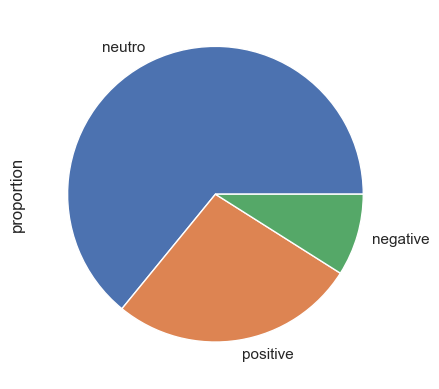

In [37]:
# Visualizacion de los resultados en un grafico de pie
sent_props = comment_sentiment.value_counts(normalize=True) 
sent_props.plot.pie()
plt.show()

### Ya realizamos el trabajo duro!

... Sin embargo, sabemos que existen muchos casos especiales que no hemos considerado, no estamos seguros de que tenemos todas las palabras posibles (de hecho podemos comprobarlo). Entonces, ¿Qué podemos hacer? 

### No reinventemos la rueda..

Una búsqueda rápida de lo que queremos hacer puede ahorrarnos horas de desarrollo al encontrar una o más herramientas que ya están listas para usar.

En este caso **hemos encontrado en Github a [senti-py](https://github.com/aylliote/senti-py) un clasificador pre-entrenado de análisis de sentimiento en español**, que ya tiene implementado una serie de pasos de **limpieza de texto en español** y esta **entrenado en un enorme corpus de texto en español** de diversas fuentes online.

In [40]:
# Importamos la libreria
%pip install spanish_sentiment_analysis
from classifier import *


  Using cached spanish_sentiment_analysis-1.0.0-py3-none-any.whl.metadata (353 bytes)
  Using cached marisa_trie-1.2.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [47]:
# Instaciamos el modelo de clasificación
clf = SentimentClassifier()

ImportError: cannot import name 'SentimentClassifier' from 'classifier' (c:\Users\gerar\anaconda3\Lib\site-packages\classifier\__init__.py)

In [ ]:
# Recordemos el texto de ejemplo
text

In [ ]:
# Realizamos la clasificacion con el método "predict"
clf.predict(text)

In [ ]:
# Ahora lo aplicamos a todos los comentarios
new_sentiment = df_fb_comments['comment_text'].apply(clf.predict)

In [ ]:
# Debido a que la clasificacion es en valores continuos 
# podemos visualizar la distribución de los datos en un histograma
new_sentiment.hist()
plt.show()

In [ ]:
g = sns.distplot(new_sentiment)

In [ ]:
# Para simplificar el analisis definiremos 3 rangos de sentimiento
labels = ['negative','neutro','positive']
bins = [-0.1, 0.4, 0.6, 1.1]
new_sentiment_cat = pd.cut(new_sentiment, bins, labels=labels)

In [ ]:
# Visualización de los resultados en un gráfico de pie
new_sent_props = new_sentiment_cat.value_counts(normalize=True)
# Utilicemos el mismo orden que en el gráfico de pie anterior
new_sent_props = new_sent_props[['neutro', 'positive','negative']]
new_sent_props.plot.pie()
plt.show()

### Analizemos más a fondo cada categoría
Existen otras posibilidades de visualización cuando se tratan de datos texuales como por ejemplo una **nube de palabras** frecuentes.

### Nubes de palabras
Este tipo de visualización te permite tener un vistazo rápido de cuales son **las palabras más usadas** con respecto a un tópico o en este caso con respecto a un sentimiento.

### Ahora realizaremos una nubbe de palabras para cada categoria de sentimiento..

In [ ]:
# Separamos los comentarios en cada categoría
positive_texts = df_fb_comments['comment_text'][new_sentiment_cat=='positive']
neutral_texts = df_fb_comments['comment_text'][new_sentiment_cat=='neutro']
negative_texts = df_fb_comments['comment_text'][new_sentiment_cat=='negative']

In [ ]:
# Importamos la librería
from wordcloud import WordCloud

In [ ]:
# Funciones de ayuda para darle color a las nubes

def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return f'hsl({random.randint(350,360)}, {random.randint(40, 100)}%, {random.randint(50, 100)}%)'


def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return f'hsl({random.randint(100,130)}, {random.randint(40, 100)}%, {random.randint(50, 100)}%)'

In [ ]:
# Une todos los comentarios en un solo texto (formato de la librería)
positive_words =' '.join([text for text in positive_texts]) 

# Se contruye la nuba de palabras
wordcloud = WordCloud(
    background_color='rgba(255,255,255,0)', mode='RGBA',
    width=1800, height=1400,
    stopwords=set(stopwords.words("spanish"))
).generate(positive_words)
# Le damos color a las palabras
wordcloud.recolor(color_func=green_color_func, random_state=3)

# Utilizamos matplotlib para visualizar la imagen generada
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Une todos los comentarios en un solo texto (formato de la librería)
negative_words =' '.join([text for text in negative_texts])

# Se contruye la nuba de palabras
wordcloud = WordCloud(
    background_color='rgba(255,255,255,0)', mode='RGBA',
    width=1800, height=1400,
    stopwords=set(stopwords.words("spanish"))
).generate(negative_words)
# Le damos color a las palabras
wordcloud.recolor(color_func=red_color_func, random_state=3)

# Utilizamos matplotlib para visualizar la imagen generada
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Une todos los comentarios en un solo texto (formato de la librería)
neutral_words =' '.join([text for text in neutral_texts])

# Se contruye la nuba de palabras
wordcloud = WordCloud(
    background_color='rgba(255,255,255,0)', mode='RGBA',
    width=1800, height=1400,
    stopwords=set(stopwords.words("spanish"))
).generate(neutral_words)

# Utilizamos matplotlib para visualizar la imagen generada
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Tambien podemos utilizar variables temporales para hacer un monitoreo del sentimiento en diferentes fechas ...

In [ ]:
# Agregamos la columna sentimiento
df_fb_comments['sent-py_sentiment'] = new_sentiment
df_fb_comments

In [ ]:
# Agrupamos por fecha
df_fb_comments.groupby('post_date').sum()

In [ ]:
# Graficamos el sentimiento promedio por día
df_fb_comments.groupby('post_date').mean()['sent-py_sentiment'].plot.line(style='-o')
plt.xticks(rotation=0)
plt.ylabel('Mean sentiment')
plt.show()

In [ ]:
# Graficamos el número de comentarios por día
df_fb_comments.groupby('post_date').count()['sent-py_sentiment'].plot.line(style='-o')
plt.xticks(rotation=0)
plt.ylabel('Numero de comentarios')
plt.show()

### ¿Qué insights podemos obtener de este análisis?

1. Revisa los resultados
2. Encuentra relaciones
3. Define acciones

### ¡Hagámoslo juntos!